In [1]:
import pandas as pd 
import numpy as np

In [2]:
data=pd.read_csv('C:\\Users\\chen jia ni\\Desktop\\wangyipy\\shujuji\\HR.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [34]:
data.tail()

,manyidu,yue_gongshi,zuoban,shigu,leixing,gongzi
14994,0.40,151,3,0,support,low
14995,0.37,160,3,0,support,low
14996,0.37,143,3,0,support,low
14997,0.11,280,4,0,support,low
14998,0.37,158,3,0,support,low


In [4]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [5]:
data = data[['satisfaction_level', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'sales', 'salary']]

In [6]:
dic = {'satisfaction_level':'manyidu','average_montly_hours':'yue_gongshi', 'time_spend_company':'zuoban',
                 'Work_accident':'shigu','sales':'leixing','salary':'gongzi'}

In [7]:
data.columns=data.columns.map(lambda x:dic.get(x))#dic.get(x)运用了字典中的值，map运用到元素

In [9]:
data.columns

Index(['manyidu', 'yue_gongshi', 'zuoban', 'shigu', 'leixing', 'gongzi'], dtype='object')

In [10]:
data.head()

,manyidu,yue_gongshi,zuoban,shigu,leixing,gongzi
0,0.38,157,3,0,sales,low
1,0.80,262,6,0,sales,medium
2,0.11,272,4,0,sales,medium
3,0.72,223,5,0,sales,low
4,0.37,159,3,0,sales,low


In [11]:
data.leixing.unique()#取列中的唯一项

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [12]:
data.leixing.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [14]:
data.leixing.value_counts()#统计数量

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: leixing, dtype: int64

In [15]:
data.groupby('leixing').size()#统计数量

leixing
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

In [17]:
data.groupby(['gongzi','leixing'])[['yue_gongshi']].mean()

yue_gongshi
gongzi leixing                 
high   IT            194.927711
       RandD         199.745098
       accounting    205.905405
       hr            209.066667
       management    200.248889
       marketing     185.575000
       product_mng   194.632353
       sales         201.178439
       support       203.985816
       technical     200.044776
low    IT            201.382594
       RandD         198.747253
       accounting    199.899441
       hr            202.456716
       management    200.744444
       marketing     204.487562
       product_mng   201.048780
       sales         200.363030
       support       198.900524
       technical     203.064869
medium IT            204.295327
       RandD         202.954301
       accounting    201.465672
       hr            193.863510
       management    202.653333
       marketing     196.869681
       product_mng   199.637076
       sales         201.520316
       support       202.535032
       technical     202.248474

In [18]:
data.groupby(['gongzi','leixing'])[['yue_gongshi']].mean().unstack()#默认转换里层的

yue_gongshi                                                  \
leixing          IT       RandD  accounting          hr  management   
gongzi                                                                
high     194.927711  199.745098  205.905405  209.066667  200.248889   
low      201.382594  198.747253  199.899441  202.456716  200.744444   
medium   204.295327  202.954301  201.465672  193.863510  202.653333   

                                                                     
leixing   marketing product_mng       sales     support   technical  
gongzi                                                               
high     185.575000  194.632353  201.178439  203.985816  200.044776  
low      204.487562  201.048780  200.363030  198.900524  203.064869  
medium   196.869681  199.637076  201.520316  202.535032  202.248474

In [20]:
data1=data.groupby(['gongzi','leixing'])[['yue_gongshi']].mean().unstack(0)#unstack(0)转换外层的

In [31]:
data1

yue_gongshi                        
gongzi             high         low      medium
leixing                                        
IT           194.927711  201.382594  204.295327
RandD        199.745098  198.747253  202.954301
accounting   205.905405  199.899441  201.465672
hr           209.066667  202.456716  193.863510
management   200.248889  200.744444  202.653333
marketing    185.575000  204.487562  196.869681
product_mng  194.632353  201.048780  199.637076
sales        201.178439  200.363030  201.520316
support      203.985816  198.900524  202.535032
technical    200.044776  203.064869  202.248474

In [32]:
data1.describe()

yue_gongshi                        
gongzi        high         low      medium
count    10.000000   10.000000   10.000000
mean    199.531015  201.109521  200.804272
std       6.624060    1.817891    3.184652
min     185.575000  198.747253  193.863510
25%     196.132058  200.015339  200.094225
50%     200.146833  200.896612  201.884395
75%     203.283971  202.188186  202.623758
max     209.066667  204.487562  204.295327

In [21]:
%matplotlib inline#在jupyter展示图片

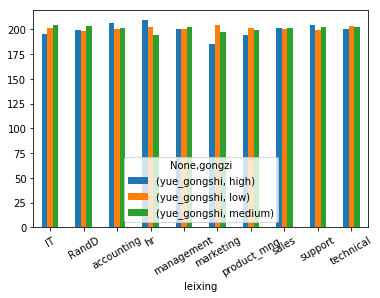

In [25]:
data1.plot.bar(rot=30)

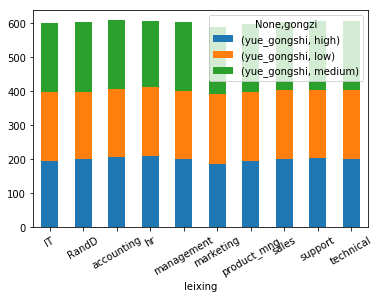

In [27]:
data1.plot.bar(stacked=True,rot=30)#stacked参数代表堆积stacked=True

** 通过满意度定义分组，返回前5 **

In [28]:
def zb(group):
    g = group['manyidu'].sort_values(ascending = False)#sort_values排序
    return g[:5]

In [30]:
def zb(group):
    g=group['manyidu'].sort_values(ascending=False)
    return g[:5]#分组，返回前五条满意度高的，group['manyidu '],zb的参数（group）可以自己设

In [29]:
data.groupby(['gongzi','leixing']).apply(zb)#显示分组下满意度前5的数据位置及对应满意度

gongzi  leixing           
high    IT           7011     0.99
                     8309     0.97
                     10749    0.96
                     12960    0.96
                     7998     0.95
        RandD        8850     0.97
                     8773     0.97
                     4044     0.94
                     8317     0.93
                     7018     0.89
        accounting   4734     0.97
                     9996     0.97
                     7510     0.96
                     9799     0.96
                     5984     0.96
        hr           8887     0.99
                     9343     0.99
                     5987     0.98
                     6594     0.98
                     3237     0.97
        management   13603    0.98
                     13557    0.98
                     11346    0.98
                     11392    0.98
                     11576    0.97
        marketing    2295     1.00
                     6955     0.99
                     7107   

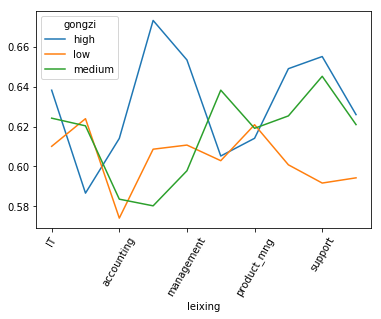

In [43]:
data.groupby(['gongzi','leixing'])['manyidu'].mean().unstack(0).plot(rot=60)#注意不要以DataFrame的形式去plot,

In [45]:
data.sort_values(by='manyidu')#通过参数by，按照满意度排序

,manyidu,yue_gongshi,zuoban,shigu,leixing,gongzi
14484,0.09,296,4,0,technical,low
1873,0.09,279,4,0,technical,low
340,0.09,308,5,0,hr,medium
1882,0.09,282,4,0,support,low
332,0.09,271,4,0,sales,low
12765,0.09,214,2,0,support,medium
12761,0.09,249,4,0,sales,low
350,0.09,304,5,0,technical,medium
761,0.09,249,4,0,sales,low
14489,0.09,254,4,0,support,low


In [46]:
data.sort_values(by='manyidu')[:5]#满意度前5

,manyidu,yue_gongshi,zuoban,shigu,leixing,gongzi
14484,0.09,296,4,0,technical,low
1873,0.09,279,4,0,technical,low
340,0.09,308,5,0,hr,medium
1882,0.09,282,4,0,support,low
332,0.09,271,4,0,sales,low


In [ ]:
cats = pd.cut(data.manyidu,4)

In [47]:
cats=pd.cut(data.manyidu,4)#将数据按满意度进行切分，分成4份

In [ ]:
cats=pd.cut(data.manyidu,4)

In [48]:
cats

0         (0.318, 0.545]
1           (0.772, 1.0]
2        (0.0891, 0.318]
3         (0.545, 0.772]
4         (0.318, 0.545]
5         (0.318, 0.545]
6        (0.0891, 0.318]
7           (0.772, 1.0]
8           (0.772, 1.0]
9         (0.318, 0.545]
10        (0.318, 0.545]
11       (0.0891, 0.318]
12          (0.772, 1.0]
13        (0.318, 0.545]
14        (0.318, 0.545]
15        (0.318, 0.545]
16        (0.318, 0.545]
17          (0.772, 1.0]
18        (0.318, 0.545]
19        (0.545, 0.772]
20       (0.0891, 0.318]
21        (0.318, 0.545]
22       (0.0891, 0.318]
23        (0.318, 0.545]
24        (0.318, 0.545]
25          (0.772, 1.0]
26          (0.772, 1.0]
27        (0.318, 0.545]
28        (0.318, 0.545]
29        (0.318, 0.545]
              ...       
14969     (0.318, 0.545]
14970       (0.772, 1.0]
14971     (0.318, 0.545]
14972    (0.0891, 0.318]
14973     (0.318, 0.545]
14974     (0.318, 0.545]
14975    (0.0891, 0.318]
14976     (0.318, 0.545]
14977       (0.772, 1.0]


In [49]:
cats.value_counts()#统计各个区间的数量

(0.545, 0.772]     4758
(0.772, 1.0]       4682
(0.318, 0.545]     3559
(0.0891, 0.318]    2000
Name: manyidu, dtype: int64

In [ ]:
data.groupby(['gongzi',cats]).size().unstack()

In [52]:
data.groupby(['gongzi',cats]).size()#统计满意度数

gongzi  manyidu        
high    (0.0891, 0.318]     130
        (0.318, 0.545]      264
        (0.545, 0.772]      465
        (0.772, 1.0]        378
low     (0.0891, 0.318]    1059
        (0.318, 0.545]     1844
        (0.545, 0.772]     2159
        (0.772, 1.0]       2254
medium  (0.0891, 0.318]     811
        (0.318, 0.545]     1451
        (0.545, 0.772]     2134
        (0.772, 1.0]       2050
dtype: int64

In [53]:
data.groupby(['gongzi',cats]).size().unstack()

manyidu,"(0.0891, 0.318]","(0.318, 0.545]","(0.545, 0.772]","(0.772, 1.0]"
gongzi,,,,
high,130,264,465,378
low,1059,1844,2159,2254
medium,811,1451,2134,2050


In [55]:
def qd(x):
    if x>250:
        return '很忙'
    elif x<200:
        return '清闲'
    else:
        return '一般'
data['qiangdu'] = data['yue_gongshi'].map(qd)

In [57]:
data['qiangdu'].head()

0    清闲
1    很忙
2    很忙
3    一般
4    清闲
Name: qiangdu, dtype: object

In [58]:
data.qiangdu.value_counts()

清闲    7466
一般    4331
很忙    3202
Name: qiangdu, dtype: int64

In [59]:
def xg(group):
    return group['manyidu'].corr(group['yue_gongshi'])

In [61]:
def xg(group):
    return group['manyidu'].corr(group['yue_gongshi'])

In [ ]:
data.groupby(['gongzi','leixing']).apply(xg)

In [62]:
data.groupby(['gongzi','leixing']).apply(xg)

gongzi  leixing    
high    IT            -0.012342
        RandD         -0.005882
        accounting    -0.116915
        hr            -0.367328
        management     0.110142
        marketing      0.043682
        product_mng    0.185977
        sales         -0.019211
        support        0.110056
        technical      0.059634
low     IT            -0.050652
        RandD          0.024502
        accounting    -0.094572
        hr             0.057382
        management     0.119263
        marketing     -0.108724
        product_mng   -0.005578
        sales          0.038390
        support       -0.037357
        technical     -0.122417
medium  IT            -0.090033
        RandD         -0.085990
        accounting    -0.126349
        hr            -0.017208
        management    -0.111219
        marketing      0.119068
        product_mng   -0.014252
        sales          0.015054
        support        0.033612
        technical     -0.057385
dtype: float64